Проанализируем выборку из дата-сета, содержащую все полученные данные Ld50_orl_rat (полулетальная доза при пероральном введении препарата крысам).

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.options.mode.chained_assignment = None
 
df = pd.read_excel('molecules_only_with_LD50.xls')
df.head()

,name,smiles,LogP,LogD_ph_5.5,LogD_ph_7.4,Ld50_orl_rat
0,mannitol,C(C(C(C(C(CO)O)O)O)O)O,-3.1,-3.29,-3.29,17000
1,methotrexate,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,-1.8,-3.91,-5.22,135
2,acetaminophen,CC(=O)NC1=CC=C(C=C1)O,0.5,0.40,0.40,1944
3,aspirin,CC(=O)OC1=CC=CC=C1C(=O)O,1.2,-0.60,-1.69,200
4,captopril,CC(CS)C(=O)N1CCCC1C(=O)O,0.3,-1.23,-2.83,4245


In [287]:
df.isnull().sum()  # Пропущенных значений нет.

name            0
smiles          0
LogP            0
LogD_ph_5.5     0
LogD_ph_7.4     0
Ld50_orl_rat    0
dtype: int64

In [4]:
df.describe()  # Приведем описательные статистики:

,LogP,LogD_ph_5.5,LogD_ph_7.4,Ld50_orl_rat
count,26.000000,26.000000,26.000000,26.000000
mean,1.611538,0.733462,0.320769,3057.923077
std,2.242022,2.313505,2.604003,4875.450124
min,-3.100000,-3.910000,-5.220000,30.000000
25%,0.075000,-0.577500,-1.362500,266.750000
50%,1.250000,0.225000,0.235000,1990.000000
75%,3.375000,2.355000,1.727500,2777.500000
max,5.700000,6.010000,6.010000,20000.000000


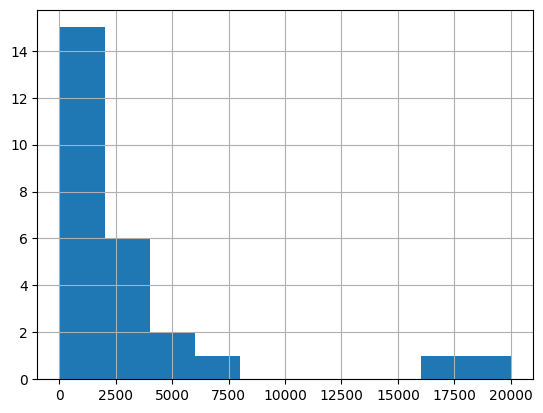

In [5]:
df['Ld50_orl_rat'].hist();  # Построим гистограмму целевого признака - Ld50_orl_rat

Ее вид уже настораживает в отношении возможных выбросов, проанализируем "ящик с усами": 

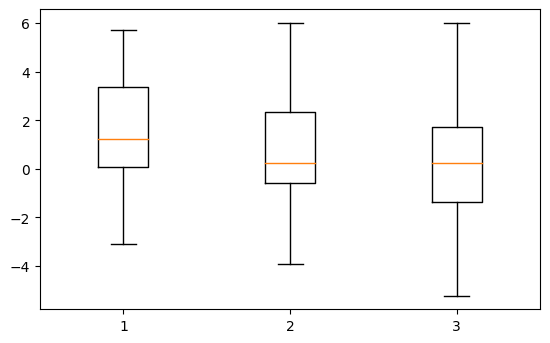

In [6]:
data1 = [df['LogP'], df['LogD_ph_5.5'], df['LogD_ph_7.4']]  
 
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data1)
plt.show()  # Выбросов среди значений LogP, LogD_ph_5.5, LogD_ph_7.4 не выявлено. 

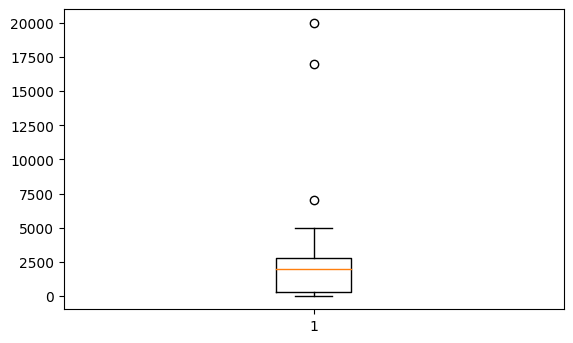

,name,smiles,LogP,LogD_ph_5.5,LogD_ph_7.4,Ld50_orl_rat
0,mannitol,C(C(C(C(C(CO)O)O)O)O)O,-3.1,-3.29,-3.29,17000
16,glibenclamide,COC1=C(C=C(C=C1)Cl)C(=O)NCCC2=CC=C(C=C2)S(=O)(...,4.8,2.87,1.85,20000
17,niacin,C1=CC(=CN=C1)C(=O)O,0.4,-1.54,-2.60,7000


In [7]:
data2 = [df['Ld50_orl_rat']]
 
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data2)
plt.show()  # По блочной диаграмме для Ld50_orl_rat обнаружены выбросы,
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]  # которые помещаем в отдельный список,
df[df['Ld50_orl_rat'].isin(outliers)]  # выводим список с выбросами по возрастанию индекса:

Для более детальной оценки однородности целевого признака Ld50_orl_rat рассмотрим следующие квартильные характеристики.

In [8]:
q1, q2, q3= np.percentile(df['Ld50_orl_rat'], [25,50,75])  # Находим первый, второй (медиану) и третий квартили,
iqr = q3 - q1  # вычисляем интерквартильный размах для Ld50_orl_rat,
dq = iqr/2  # вычисляем квартильное отклонение для описания вариации центральной части признака,
vq = dq/q2  # рассчитываем квартиальный коэффициент вариации, показывающий колеблемость вокруг медианы. 
vq

0.6308417085427136

Значение vq= 0.6 ближе к 1, нежеле к 0, что позволяет судить о значительной неоднородности или существенной колеблемости целевого признака Ld50_orl_rat. Таким образом, выборочная совокупность не является робастной, выявлена необходимость исключить из неё выбросы для снижения их влияния на результат дальнейшего корреляицонно-регрессионного анализа.
Тем не менее, принимается во внимание и то, что результаты могут быть недостаточно достовернными ввиду малого размера выборки, увеличение которого не представляется возможным на данном этапе исследования. 

In [9]:
df_robust = df[-df['Ld50_orl_rat'].isin(outliers)]  # Исключаем выявленные ранее выбросы в Ld50_orl_rat из выборки,
df_robust.reset_index(inplace=True, drop=True)  # осуществляем сброс индексов в новом датасете

df_robust

,name,smiles,LogP,LogD_ph_5.5,LogD_ph_7.4,Ld50_orl_rat
0,methotrexate,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,-1.8,-3.91,-5.22,135
1,acetaminophen,CC(=O)NC1=CC=C(C=C1)O,0.5,0.40,0.40,1944
2,aspirin,CC(=O)OC1=CC=CC=C1C(=O)O,1.2,-0.60,-1.69,200
3,captopril,CC(CS)C(=O)N1CCCC1C(=O)O,0.3,-1.23,-2.83,4245
4,nitrofurantoin,C1C(=O)NC(=O)N1N=CC2=CC=C(O2)[N+](=O)[O-],-0.5,-0.03,-0.26,604
5,propylthiouracil,CCCC1=CC(=O)NC(=S)N1,0.8,0.46,0.34,1980
6,theophylline,CN1C2=C(C(=O)N(C1=O)C)NC=N2,0.0,0.00,-0.03,244
7,vitamin a,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CCO)C)C,5.7,6.01,6.01,2000
8,itraconazole,CCC(C)N1C(=O)N(C=N1)C2=CC=C(C=C2)N3CCN(CC3)C4=...,5.7,3.90,4.96,320
9,progesterone,CC(=O)C1CCC2C1(CCC3C2CCC4=CC(=O)CCC34C)C,3.9,3.72,3.72,5000


In [10]:
# Осуществляем проверку на мультиколлинеарность:
matrix = df_robust.corr(numeric_only=True)  # Построим корреляционную матрицу факторов и целевого признака.
matrix

,LogP,LogD_ph_5.5,LogD_ph_7.4,Ld50_orl_rat
LogP,1.000000,0.830625,0.848808,0.098810
LogD_ph_5.5,0.830625,1.000000,0.933540,0.047303
LogD_ph_7.4,0.848808,0.933540,1.000000,0.078542
Ld50_orl_rat,0.098810,0.047303,0.078542,1.000000


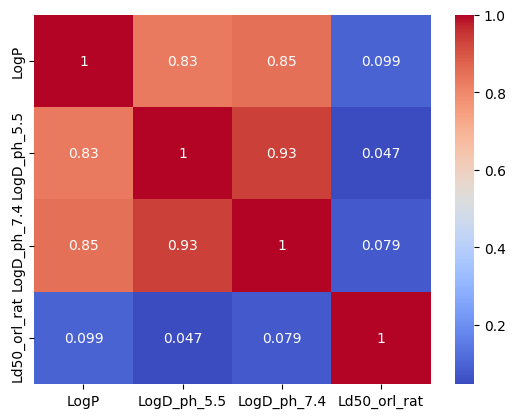

In [26]:
# Для лучшей визуализации матрицы корреляции воспользуемся heatmap.
sns.heatmap(df_robust.corr(numeric_only=True), cmap='coolwarm', annot = True);  

In [11]:
#Вычислим ранг полученной матрицы корреляций:

print('Rank:', np.linalg.matrix_rank(matrix))

Rank: 4


In [12]:
# Множественный R^2 (коэффициент детерминации):
print('Determinant: {:.4f}'.format(np.linalg.det(matrix)))

Determinant: 0.0339


Абсолютно идентичных признаков нет, т.к. ранг матрицы равен количеству факторов, корреляционная матрица обусловлена плохо, т.к. определитель близок к нулю.
Так как факторные признаки коррелируют друг с другом, можем говорить о наличии мультиколлинеарности, поэтому аппроксимация моделью множественной регресии нецелесообразна. 

<!-- - Высококоррелируют между собой logD_ph_5.5 logD_ph_7.4 (коэффициент больше 0.7, ожидаемо имеют небольшие отклонения значений между собой), также высокая корреляция прослеживается между данными показателями и logP.
- logP: его коэффициент модели свидетельствует о прямой зависимости с целевой переменной (2670.3), в то время как коэффициент корреляции демонстрирует слабую отрицательную корреляцию (-0.052).  -->


In [75]:
# Построим модель парной линейной регрессии, описывающей предполагаемую зависимость Ld50_orl_rat от LogP.

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

X = np.array(df_robust['LogP']).reshape(-1, 1)   # Значения факторной переменной (предиктора).
y = np.array(df_robust['Ld50_orl_rat']).reshape(-1, 1)  # Значения целевой переменной (предиката).

# Воспользуемся рассчетом линейной регрессии из библиотеки sklearn: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [76]:
y_pred = model.predict(X_test)  # Прогнозируемые значения LD50_orl_rat на основе обучения модели парной регрессии.
y_pred

array([[1655.98617852],
       [1513.57470995],
       [2288.92603887],
       [1323.69275184],
       [1782.57415059],
       [1323.69275184]])

In [77]:
mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)  # Средняя абсолютная ошибка в процентах.
mape

11.82589857292424

<AxesSubplot: xlabel='LogP', ylabel='Ld50_orl_rat'>

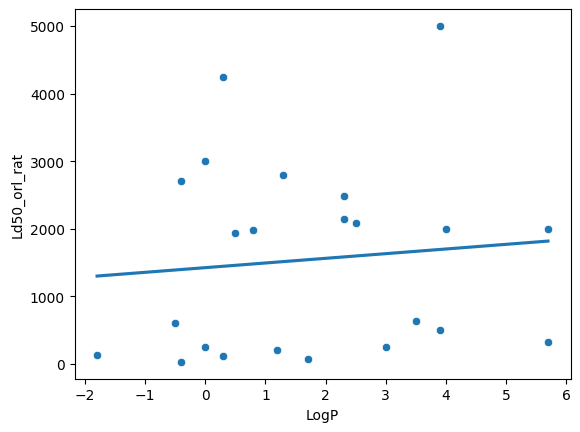

In [33]:
# Полученную модель зависимости представим в виде корреляционного поля (диаграмма рассеяния с отложенной линией регрессии).
df_robust_binary = df_robust[['LogP', 'Ld50_orl_rat']]
tx = sns.scatterplot(x ="LogP", y ="Ld50_orl_rat", data = df_robust_binary)
sns.regplot (x ="LogP", y ="Ld50_orl_rat", data = df_robust_binary, scatter=False, ax=tx, ci=None)

Зависимость не носит линейный характер, качество построенной модели регрессии оценивая средней ошибкой, выраженной в процентах, следует охарактеризовать как неудовлетворительное, т.к. ее значение значительно превышает допустимое.
